## Numerical Differentiation

### Lab Objective
The derivative is critically important in many applications. Depending on the
application and on the available information, the derivative may be calculated symbolically, numerically, or with differentiation software. In this lab we explore these three ways to take a derivative,
discuss what settings they are each appropriate for, and demonstrate their strengths and weaknesses.

In [114]:
import numpy as np
import scipy as sy
import sympy as sp
import matplotlib.pyplot as plt
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

## Problem 1

In [73]:
def z():
    
    x = sp.symbols('x')
    f = (sp.sin(x) + 1) ** (sp.sin(sp.cos(x)))
    df = sp.diff(f, x)
    l_df = sp.utilities.lambdify(x, df)
    l_f = sp.utilities.lambdify(x, f)
    
    return l_f, l_df

In [74]:
f, df = z()

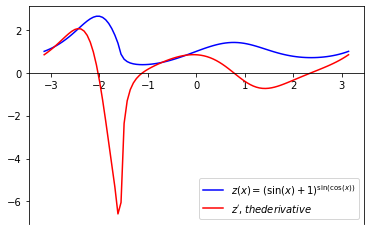

In [76]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
domain = np.linspace(-np.pi, np.pi, 100)
ax.plot(domain, f(domain), 'b-', label=r'$z(x) = (\sin(x) + 1)^{\sin(\cos(x))}$')
ax.plot(domain, df(domain),'r-', label=r'$z^{\prime}, the derivative$')
plt.legend()
plt.show()

The zero of the derivative correspond to the extrema points of z.

## Problem 2 (The calculus of finite differences) Quite close approximations to be seen here.

In [77]:
def forward_1(f, x, h): 
    df1 = (f(x+h) - f(x))/h
    return df1

def forward_2(f, x, h):
    df2 = (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h))/2*h
    return df2

def backward_1(f, x, h):
    bf1 = (f(x) - f(x-h))/h 
    return bf1

def backward_2(f, x, h):
    bf2= (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/2*h
    return bf2

def centered_2(f, x, h):
    cf2= (f(x + h) - f(x - h))/2*h
    return cf2

def centered_4(f, x, h):
    cf4 = (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h))/12*h
    return cf4

In [78]:
def approx_func(x):
    return (np.sin(x) + 1) ** (np.sin(np.cos(x)))

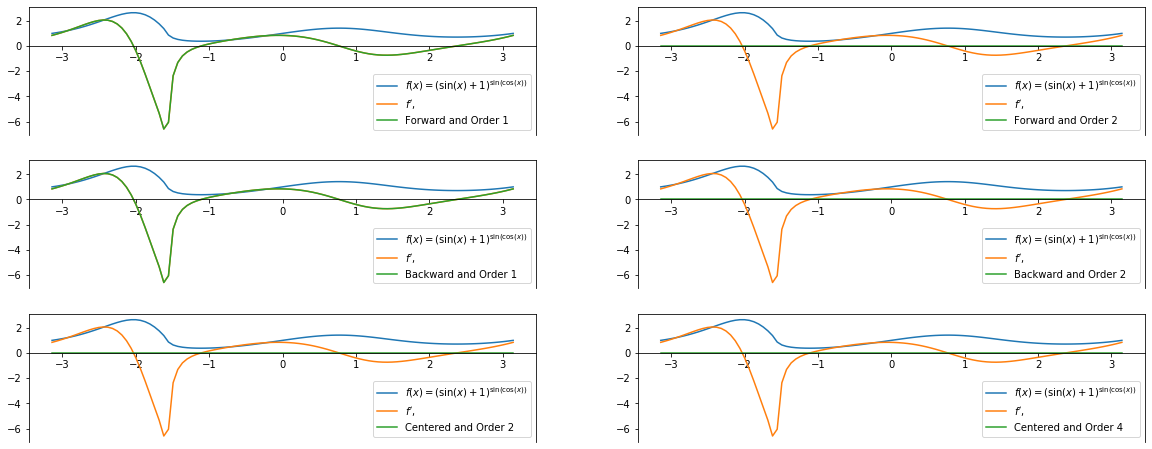

In [79]:
fig, ax = plt.subplots(3, 2, figsize=(20,8))
h = 0.0000000099999

def make_plot(ax, f, symdf, df, domain, h, label):
    ax.spines["bottom"].set_position("zero")
    domain = np.linspace(-np.pi, np.pi, 100)
    ax.plot(domain, f(domain), label=r'$f(x) = (\sin(x) + 1)^{\sin(\cos(x))}$')
    ax.plot(domain, symdf(domain), label=r'$f^{\prime}$, ')
    ax.plot(domain, df(approx_func, domain, h), label=label)
    ax.legend()

make_plot(ax[0,0], f, df, forward_1, domain, h, 'Forward and Order 1')  
make_plot(ax[0,1], f, df, forward_2, domain, h, 'Forward and Order 2')   
make_plot(ax[1,0], f, df, backward_1, domain, h, 'Backward and Order 1')   
make_plot(ax[1,1], f, df, backward_2, domain, h, 'Backward and Order 2')   
make_plot(ax[2,0], f, df, centered_2, domain, h, 'Centered and Order 2')   
make_plot(ax[2,1], f, df, centered_4, domain, h, 'Centered and Order 4')   
plt.show()

## Problem 3 (Something sketchy happened here)

In [89]:
g = np.logspace(-8, 1, num=10) #I had initially called my function h, so will have to modify here.
f1 = np.zeros(len(g), dtype=np.float64)
f2 = np.zeros(len(g), dtype=np.float64)
m1 = np.zeros(len(g), dtype=np.float64)
m2 = np.zeros(len(g), dtype=np.float64)
n2 = np.zeros(len(g), dtype=np.float64)
n4 = np.zeros(len(g), dtype=np.float64)

In [90]:
f, df = z()
domain = 1

In [91]:
for index, gstep in enumerate(g):
    f1[index] = np.abs(df(domain) - forward_1(approx_func, domain, gstep))
    f2[index] = np.abs(df(domain) - forward_2(approx_func, domain, gstep))
    m1[index] = np.abs(df(domain) - backward_1(approx_func, domain, gstep))
    m2[index] = np.abs(df(domain) - backward_2(approx_func, domain, gstep))
    n2[index] = np.abs(df(domain) - centered_2(approx_func, domain, gstep))
    n4[index] = np.abs(df(domain) - centered_4(approx_func, domain, gstep))

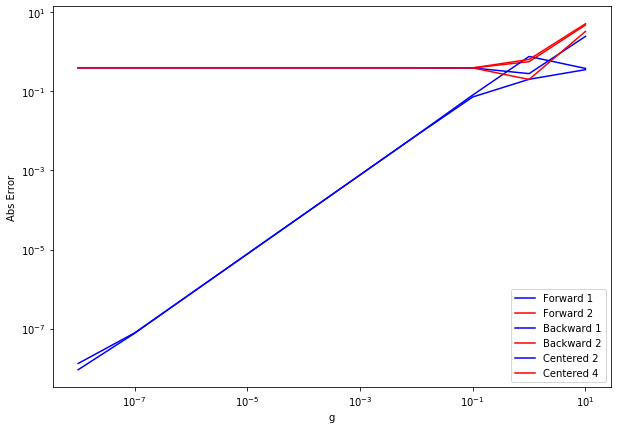

In [92]:
fig = plt.figure(figsize=(10,7))
plt.loglog()
plt.plot(g, f1, '-b', label='Forward 1')
plt.plot(g, f2, '-r', label='Forward 2')
plt.plot(g, m1, '-b', label='Backward 1')
plt.plot(g, m2, '-r', label='Backward 2')
plt.plot(g, n2, '-b', label='Centered 2')
plt.plot(g, n4, '-r', label='Centered 4')
plt.legend()
plt.xlabel('g')
plt.ylabel('Abs Error')
plt.show()

## Problem 5 Approxing Jacobian

In [104]:
def approx_jacobian_centered(f, x, h):
    n = np.shape(x)[0]
    m = np.shape(f(x))[0]
    
    jacobian = np.zeros((m,n))
    for i in range(n):
        e = np.eye(n)[:,i]
        jacobian[:, i] = (f(x + h * e) - f(x - h * e)) / (2 * h)
    return jacobian

f = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1]])
approx_jacobian_centered(f, np.array([0, 0]), 1e-4)

array([[ 0.e+00,  0.e+00],
       [ 1.e-08, -1.e+00]])

In [105]:
x, y = sp.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y
F = sp.Matrix([f1,f2])  

In [106]:
F.jacobian([x,y])
F.jacobian([x,y]).subs([(x,0), (y,0)]) #Close enough

Matrix([
[0,  0],
[0, -1]])

## Problem 6 (Chebyshev Polynomials)

In [124]:
def T(x, n):
    
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
        
    return 2 * x * T(x, n - 1) - T(x, n - 2)

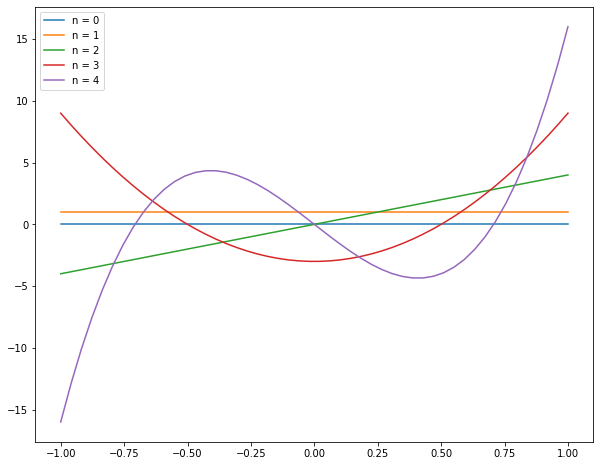

In [127]:
d = elementwise_grad(T)
grid = anp.linspace(-1, 1)
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(grid, d(grid, i), label=f'n = {i}')
plt.legend()
plt.show()

## We had a week long immersion in Chebyshev polynomials! A variant of this question could be to work with google tangent.